# **EDA_Indian_Premier_League_(IPL)_Data**
# **By Amit Kharche**
**Follow me** on [Linkedin](https://www.linkedin.com/in/amit-kharche) and [Medium](https://medium.com/@amitkharche14) for more insights on **Data Science** and **Artificial intelligence (AI)**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)<br>
  - **3.2** [**Upgrading Libraries**](#Section32)<br>
  - **3.3** [**Importing Libraries**](#Section33)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
  - [**8.1. What is the distribution of passenger satisfaction levels?**](#section81)<br>
  - [**8.2. How does satisfaction vary across different travel classes (Eco, Eco Plus, Business)?**](#section82)<br>
  - [**8.3. Are loyal customers more likely to be satisfied than disloyal customers?**](#section83)<br>
  - [**8.4. Does gender have any noticeable impact on satisfaction ratings?**](#section84)<br>
  - [**8.5. What is the age distribution of passengers, and how does age relate to satisfaction?**](#section85)<br>
  - [**8.6. Do passengers traveling for business report higher satisfaction than those on personal trips?**](#section86)<br>
  - [**8.7. How do service quality ratings (e.g., Food, Seat Comfort, Inflight Entertainment) affect satisfaction?**](#section87)<br>
  - [**8.8. What is the impact of flight delays (departure or arrival) on satisfaction?**](#section88)<br>
  - [**8.9. Which inflight services are rated the lowest and highest on average?**](#section89)<br>
  - [**8.10. Is there a correlation between flight distance and passenger satisfaction?**](#section810)<br>
  - [**8.11. Does online check-in or ease of booking influence how satisfied passengers feel?**](#section811)<br>
  - [**8.12. What combination of features most strongly predicts passenger satisfaction?**](#section812)<br>

**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section9.1)<br>
  - **9.2** [**Actionable Insights***](#Section9.1)<br>

---
<a name = Section1></a>
# **1. Introduction**
---
The Indian Premier League (IPL) is one of the most celebrated and commercially successful T20 cricket leagues globally, attracting top talent and massive viewership. Since its inception in 2008, the IPL has evolved into a data-rich sporting event, offering a treasure trove of insights into team strategies, player performances, and match dynamics. With each match generating granular data — from toss decisions and match outcomes to ball-by-ball deliveries — the IPL presents a unique opportunity for data-driven exploration and storytelling.

This project aims to perform an Exploratory Data Analysis (EDA) on IPL data spanning multiple seasons. The dataset comprises two key components: match-level data (`ipl_matches.csv`) and delivery-level data (`ipl_deliveries.csv`). By merging and analyzing these datasets, we can uncover patterns, trends, and anomalies that define the league's competitive landscape. The EDA will serve as a foundation for deeper analytical tasks such as predictive modeling, performance benchmarking, and strategic simulations.

---

---
<a name = Section2></a>
# **2. Problem Statement**
---
The primary objective of this project is to conduct a comprehensive Exploratory Data Analysis (EDA) of IPL matches and deliveries to derive actionable insights and uncover hidden patterns. Specifically, the project seeks to answer the following questions:

- What are the trends in match outcomes based on toss decisions and venues?
- Which teams and players have consistently outperformed others across seasons?
- How do batting and bowling performances vary by innings, overs, and match situations?
- What are the most common modes of dismissal, and how do they impact match results?
- Are there any seasonal or team-specific patterns in scoring and wicket-taking?

To achieve this, we will preprocess and merge the match-level and delivery-level datasets, perform univariate and multivariate analyses, and visualize key metrics. The insights derived will not only enhance our understanding of the IPL's dynamics but also provide a data-driven basis for strategic decision-making in cricket analytics.

---
<center><img style="width:60%; height:300px" src="https://indianexpress.com/wp-content/uploads/2018/04/ipl-m3.jpg"  height="300" width="">

---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [3]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install ydata_profiling

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [4]:
!pip install -q --upgrade datascience                               # Package that is required by pandas profiling
!pip install -q --upgrade pandas-profiling                          # Library to generate basic statistics about data

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


<a name = Section33></a>
### **3.3 Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [5]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                        # To perform data profiling
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # For numerical python operations
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objs as go                                      # For interactive graphs
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
import matplotlib.pyplot as plt                 # Importing pyplot interface of matplotlib
import seaborn as sns                           # Importing seaborn library for interactive visualization
%matplotlib inline

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

The IPL dataset consists of two primary components:

**IPL Matches Dataset**: Contains match-level information such as teams, venue, toss decisions, match results, and umpires.

**IPL Deliveries Dataset**: Contains ball-by-ball delivery data including batsman, bowler, runs scored, extras, and dismissals.
These tables provide a detailed description of each column in both datasets.

<div style="display: flex; gap: 40px;">

<div style="flex: 1;">
<h3> IPL Matches Dataset</h3>

| Column Name       | Description                                                  |
|-------------------|--------------------------------------------------------------|
| `id`              | Unique identifier for each match                             |
| `season`          | Season year of the IPL                                       |
| `city`            | City where the match was played                              |
| `date`            | Date when the match was played                               |
| `team1`           | Name of team 1                                               |
| `team2`           | Name of team 2                                               |
| `toss_winner`     | Team that won the toss                                       |
| `toss_decision`   | Decision made by the toss winner (bat/field)                 |
| `result`          | Result of the match (normal/tie)                             |
| `dl_applied`      | Duckworth-Lewis method applied (0/1)                         |
| `winner`          | Team that won the match                                      |
| `win_by_runs`     | Margin of victory by runs                                    |
| `win_by_wickets`  | Margin of victory by wickets                                 |
| `player_of_match` | Player awarded as the best performer of the match            |
| `venue`           | Stadium where the match was played                           |
| `umpire1`         | Name of the first umpire                                     |
| `umpire2`         | Name of the second umpire                                    |
| `umpire3`         | Name of the third umpire (if applicable)                     |

</div>

<div style="flex: 1;">
<h3> IPL Deliveries Dataset</h3>

| Column Name        | Description                                                  |
|--------------------|--------------------------------------------------------------|
| `match_id`         | Unique identifier for each match                             |
| `inning`           | Inning number (1/2)                                          |
| `batting_team`     | Name of the batting team                                     |
| `bowling_team`     | Name of the bowling team                                     |
| `over`             | Over number                                                  |
| `ball`             | Ball number within the over                                  |
| `batsman`          | Name of the batsman on strike                                |
| `non_striker`      | Name of the non-striker batsman                              |
| `bowler`           | Name of the bowler                                           |
| `is_super_over`    | Indicator if the ball is part of a super over (0/1)          |
| `wide_runs`        | Number of runs scored as wides                               |
| `bye_runs`         | Number of runs scored as byes                                |
| `legbye_runs`      | Number of runs scored as leg byes                            |
| `noball_runs`      | Number of runs scored as no balls                            |
| `penalty_runs`     | Number of penalty runs                                       |
| `batsman_runs`     | Number of runs scored by the batsman                         |
| `extra_runs`       | Number of extra runs                                         |
| `total_runs`       | Total number of runs scored in the delivery                  |
| `player_dismissed` | Name of the player dismissed (if applicable)                 |
| `dismissal_kind`   | Type of dismissal (if applicable)                            |
| `fielder`          | Name of the fielder involved in the dismissal (if applicable)|

</div>

</div>


In [6]:
#load 1st dataset
matches = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/amitkharche/exploratory_data_analysis_projects_amit_kharche/refs/heads/main/EDA_Indian_Premier_League%20(IPL)_Data_amit_kharche/ipl_matches.csv')
print('Data Shape:', matches.shape)
matches.head()

Data Shape: (696, 18)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [8]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               696 non-null    int64 
 1   season           696 non-null    int64 
 2   city             689 non-null    object
 3   date             696 non-null    object
 4   team1            696 non-null    object
 5   team2            696 non-null    object
 6   toss_winner      696 non-null    object
 7   toss_decision    696 non-null    object
 8   result           696 non-null    object
 9   dl_applied       696 non-null    int64 
 10  winner           693 non-null    object
 11  win_by_runs      696 non-null    int64 
 12  win_by_wickets   696 non-null    int64 
 13  player_of_match  693 non-null    object
 14  venue            696 non-null    object
 15  umpire1          695 non-null    object
 16  umpire2          695 non-null    object
 17  umpire3          60 non-null     ob

In [9]:
#Load 2nd dataset
deliveries = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/amitkharche/exploratory_data_analysis_projects_amit_kharche/refs/heads/main/EDA_Indian_Premier_League%20(IPL)_Data_amit_kharche/ipl_deliveries.csv')
print('Data Shape:', deliveries.shape)
deliveries.head()

Data Shape: (164750, 21)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000
mean,977.951757,1.482307,10.151879,3.616243,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129
std,2147.671843,0.501592,5.675666,1.807398,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,349.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,521.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,7953.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [11]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          164750 non-null  int64 
 1   inning            164750 non-null  int64 
 2   batting_team      164750 non-null  object
 3   bowling_team      164750 non-null  object
 4   over              164750 non-null  int64 
 5   ball              164750 non-null  int64 
 6   batsman           164750 non-null  object
 7   non_striker       164750 non-null  object
 8   bowler            164750 non-null  object
 9   is_super_over     164750 non-null  int64 
 10  wide_runs         164750 non-null  int64 
 11  bye_runs          164750 non-null  int64 
 12  legbye_runs       164750 non-null  int64 
 13  noball_runs       164750 non-null  int64 
 14  penalty_runs      164750 non-null  int64 
 15  batsman_runs      164750 non-null  int64 
 16  extra_runs        164750 non-null  int

In [12]:
#merging the 2 datasets
merge_df = pd.merge(deliveries,matches, left_on='match_id', right_on ='id')
merge_df.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [13]:
merge_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000
mean,977.951757,1.482307,10.151879,3.616243,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129,977.951757,2012.961360,0.019472,13.589663,3.254161
std,2147.671843,0.501592,5.675666,1.807398,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255,2147.671843,3.063119,0.138177,23.381121,3.368754
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,175.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,175.000000,2010.000000,0.000000,0.000000,0.000000
50%,349.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,349.000000,2013.000000,0.000000,0.000000,3.000000
75%,521.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,521.000000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [14]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          164750 non-null  int64 
 1   inning            164750 non-null  int64 
 2   batting_team      164750 non-null  object
 3   bowling_team      164750 non-null  object
 4   over              164750 non-null  int64 
 5   ball              164750 non-null  int64 
 6   batsman           164750 non-null  object
 7   non_striker       164750 non-null  object
 8   bowler            164750 non-null  object
 9   is_super_over     164750 non-null  int64 
 10  wide_runs         164750 non-null  int64 
 11  bye_runs          164750 non-null  int64 
 12  legbye_runs       164750 non-null  int64 
 13  noball_runs       164750 non-null  int64 
 14  penalty_runs      164750 non-null  int64 
 15  batsman_runs      164750 non-null  int64 
 16  extra_runs        164750 non-null  int

### Observation
- The dataset contains **164,750 entries** and **39 columns**, representing detailed ball-by-ball data from cricket matches.
- It includes key match details like `match_id`, `inning`, `batting_team`, `bowling_team`, and `over`.
- Player-specific actions are recorded, such as `batsman`, `bowler`, `runs`, and `dismissals`.
- Some columns like `player_dismissed`, `fielder`, and `umpire3` have **missing values**.
- The data types are a mix of **integers (18 columns)** and **objects/strings (21 columns)**, using about **50.3 MB** of memory.


---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __bd_train_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 39/39 [00:10<00:00,  3.72it/s]


KeyboardInterrupt: 

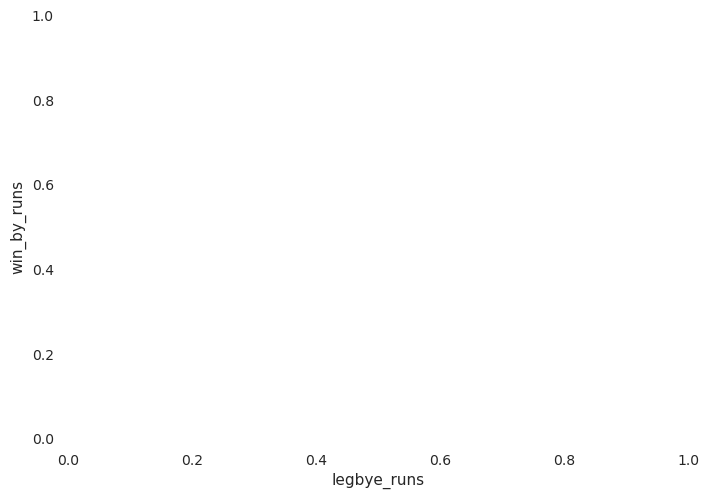

In [15]:
from pandas_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(merge_df, title="Profile Report", explorative=True)

# Save the report as HTML
profile.to_file("Pre_Profiling_Report.html")

print("Profiling report saved successfully!")

---
<a name = Section6></a>
# **6. Data Cleaning**
---

<a id=section401></a>
### 6.1 Data Preprocessing

In [16]:
# Set 'id' as index in matches dataset
merge_df.set_index('id', inplace=True)

In [17]:
# Fill missing values in 'city' column with 'Dubai'
merge_df['city'] = merge_df['city'].fillna('Dubai')

In [18]:
# Drop 'umpire3' column due to excessive missing values
merge_df.drop(columns=['umpire3'], inplace=True)

In [20]:
# Replace 'Rising Pune Supergiant' with 'Rising Pune Supergiants' in relevant columns
merge_df['team1'] = merge_df['team1'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
merge_df['team2'] = merge_df['team2'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
merge_df['winner'] = merge_df['winner'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
merge_df['batting_team'] = merge_df['batting_team'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
merge_df['bowling_team'] = merge_df['bowling_team'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')

In [24]:
# Replace city and venue names
merge_df['city'] = merge_df['city'].replace('Bangalore', 'Bengaluru')
merge_df['city'] = merge_df['city'].replace('Chandigarh', 'Mohali')
merge_df['venue'] = merge_df['venue'].replace( 'Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association IS Bindra Stadium, Mohali')

In [26]:
# Create crosstab of city vs venue
city_venue = pd.crosstab(matches['city'], matches['venue'])

# Convert all non-zero values to 1
city_venue = city_venue.applymap(lambda x: 1 if x != 0 else 0)

# Count number of unique stadiums per city
city_venue['count'] = city_venue.sum(axis=1)

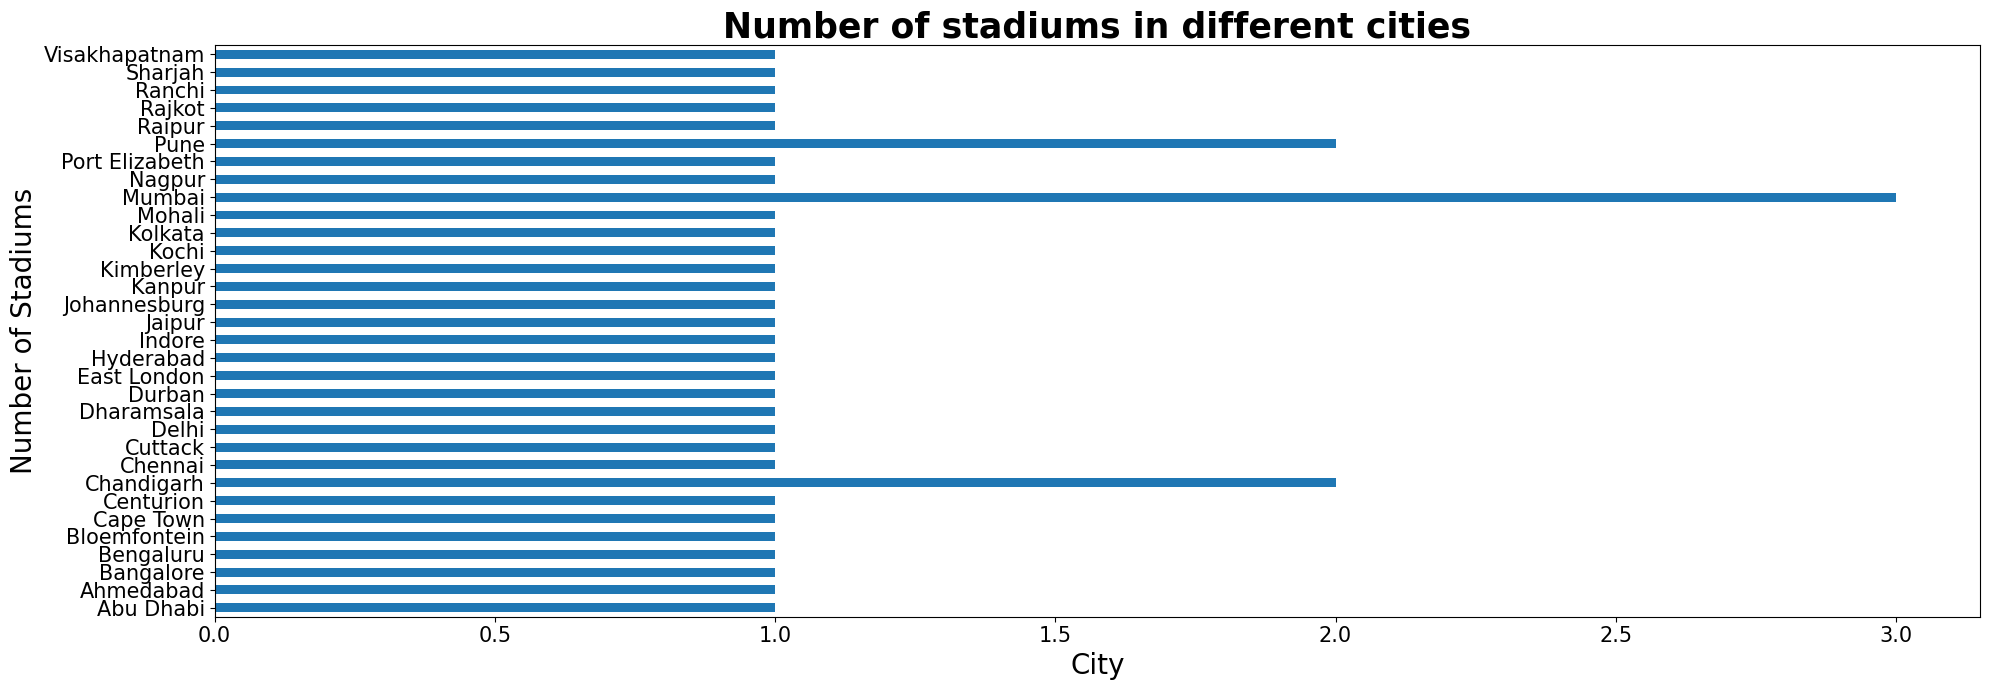

In [28]:
# Plot the result
plt.figure(figsize=(20, 7))
city_venue['count'].plot(kind='barh')
plt.title("Number of stadiums in different cities", fontsize=25, fontweight='bold')
plt.xlabel("City", fontsize=20)
plt.ylabel("Number of Stadiums", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

<a id=section7></a>
---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

####  Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __avocado_train_after_preprocessing.html__.

In [45]:
from pandas_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(data, title="Profile Report", explorative=True)

# Save the report as HTML
profile.to_file("Post_Profiling_Report.html")

print("Profiling report saved successfully!")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 23/23 [00:00<00:00, 32.22it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved successfully!


---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

<a id=section81></a>
**8.1. What is the distribution of passenger satisfaction levels?**

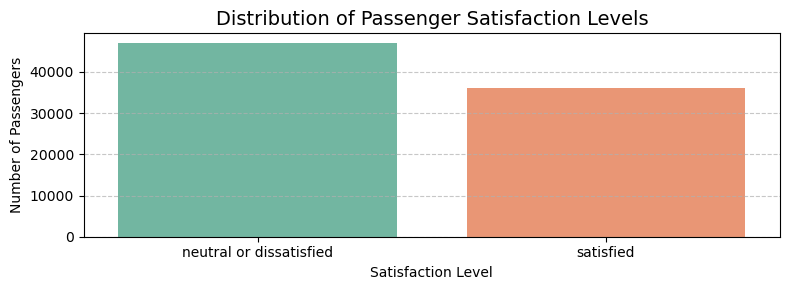

### Observation:


<a id=section82></a>
**8.2. How does satisfaction vary across different travel classes (Eco, Eco Plus, Business)?**

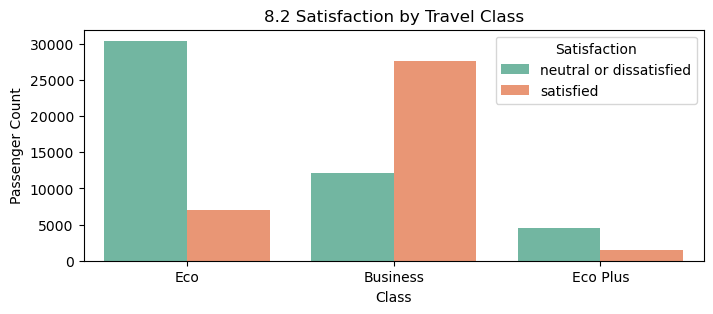

### Observation:



<a id=section83></a>
**8.3. Are loyal customers more likely to be satisfied than disloyal customers?**

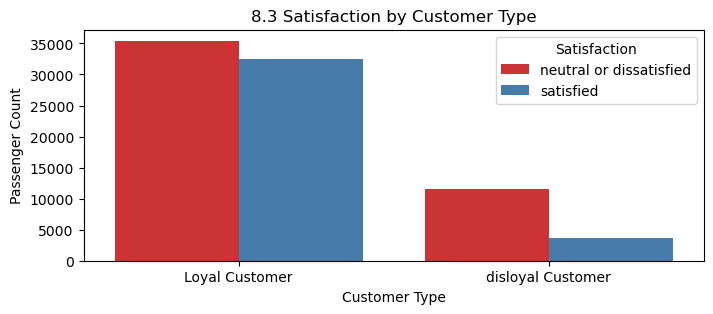

### Observation:



<a id=section84></a>
**8.4. Does gender have any noticeable impact on satisfaction ratings?**

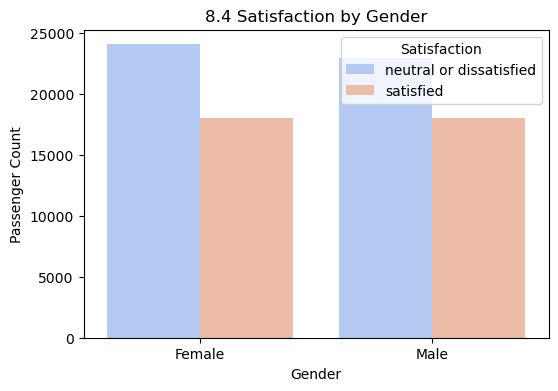

### Observation:




<a id=section85></a>
**8.5. What is the age distribution of passengers, and how does age relate to satisfaction?**

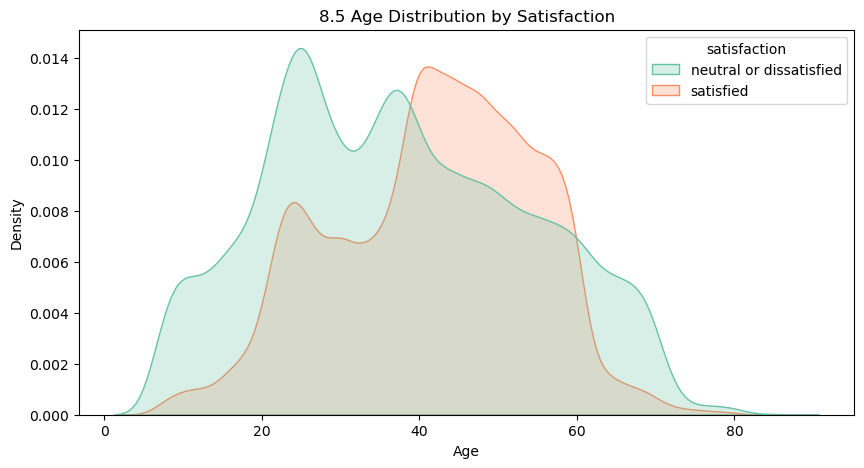

### Observation:



<a id=section86></a>
**8.6. Do passengers traveling for business report higher satisfaction than those on personal trips?**

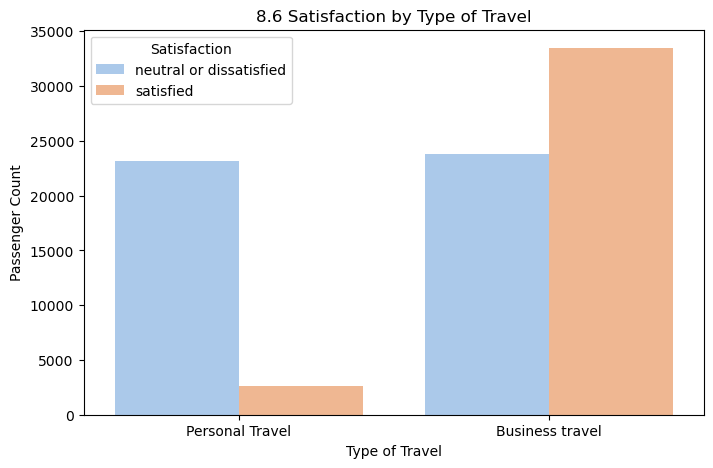

### Observation:



<a id=section87></a>
**8.7. How do service quality ratings (e.g., Food, Seat Comfort, Inflight Entertainment) affect satisfaction?**

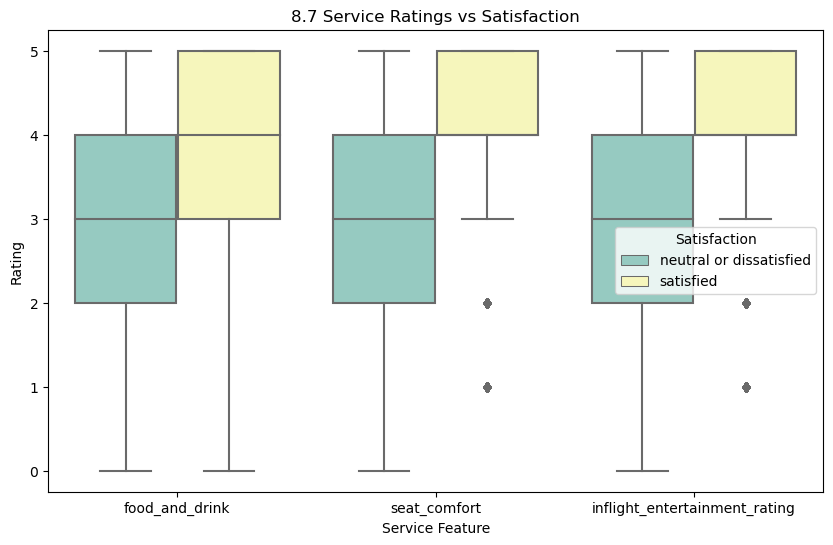

### Observation:




<a id=section88></a>
**8.8. What is the impact of flight delays (departure or arrival) on satisfaction?**

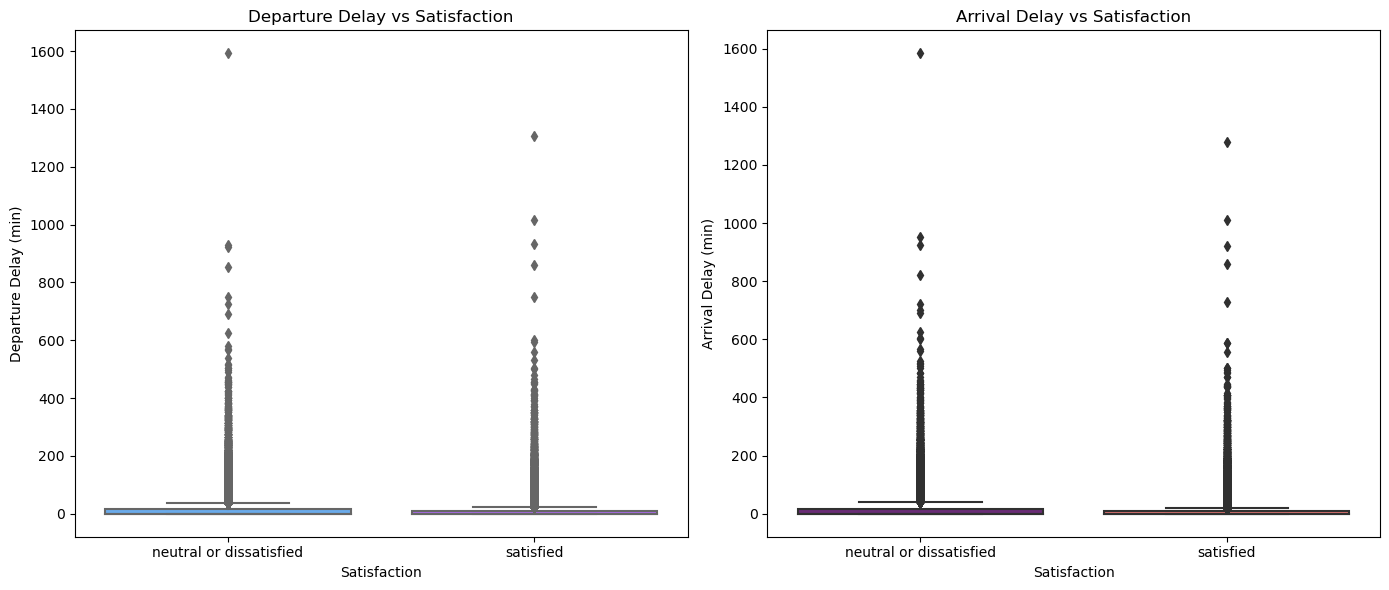

### Observation:



<a id=section89></a>
**8.9. Which inflight services are rated the lowest and highest on average?**

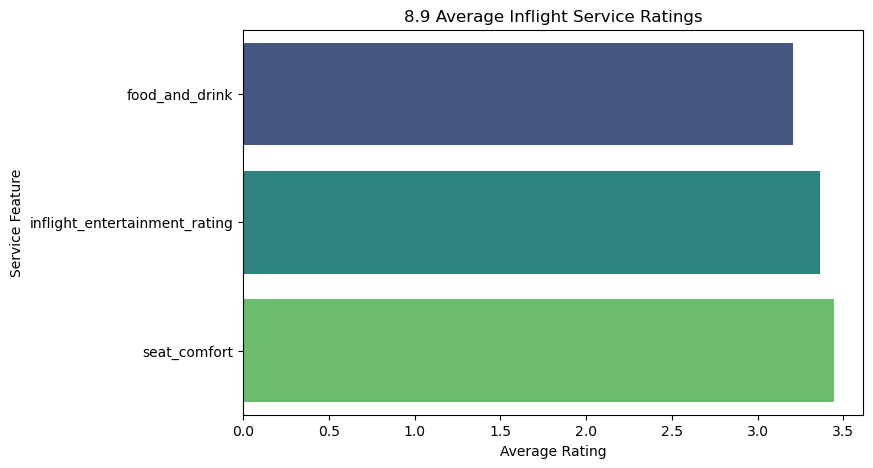

### Observation:




<a id=section810></a>
**8.10. Is there a correlation between flight distance and passenger satisfaction?**

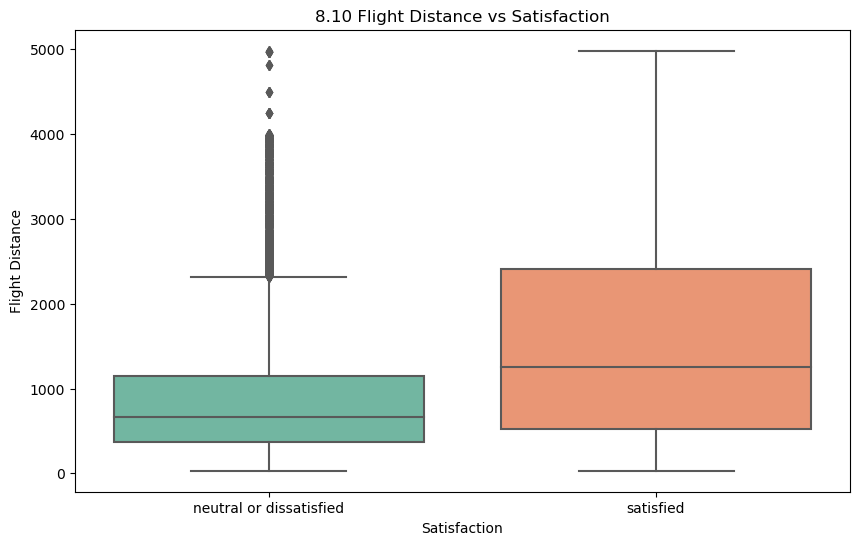

### Observation:




<a id=section811></a>
**8.11. Does online check-in or ease of booking influence how satisfied passengers feel?**

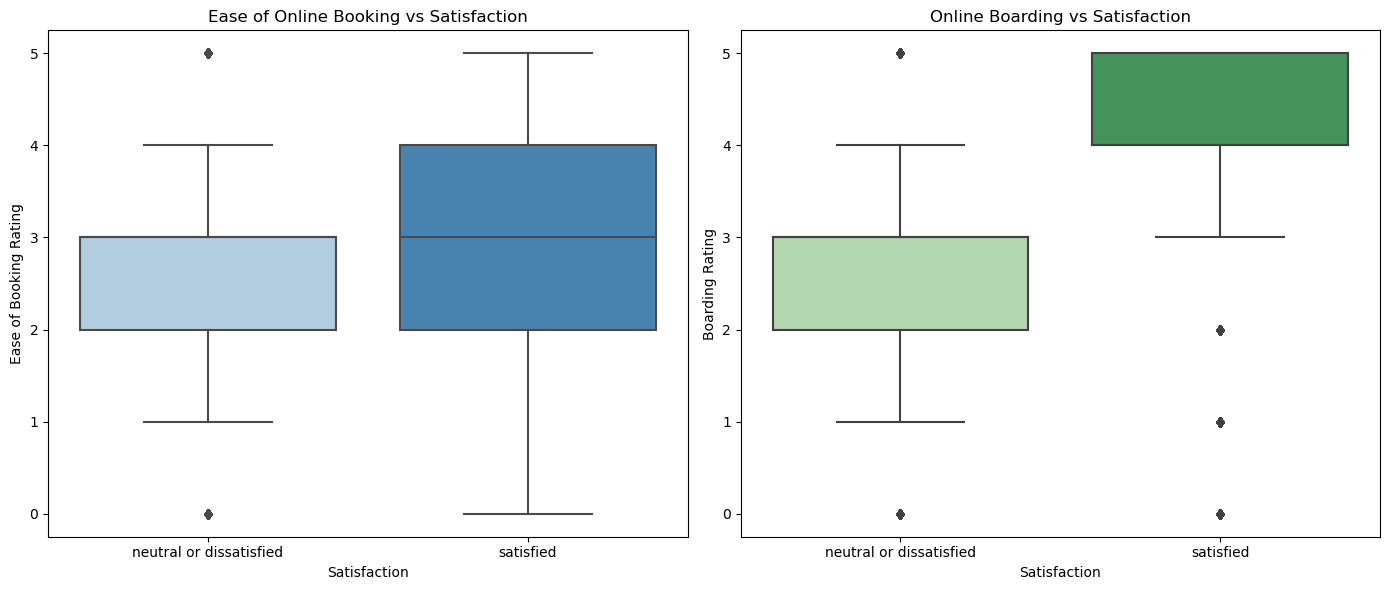

### Observation:




<a id=section812></a>
**8.12. What combination of features most strongly predicts passenger satisfaction?**

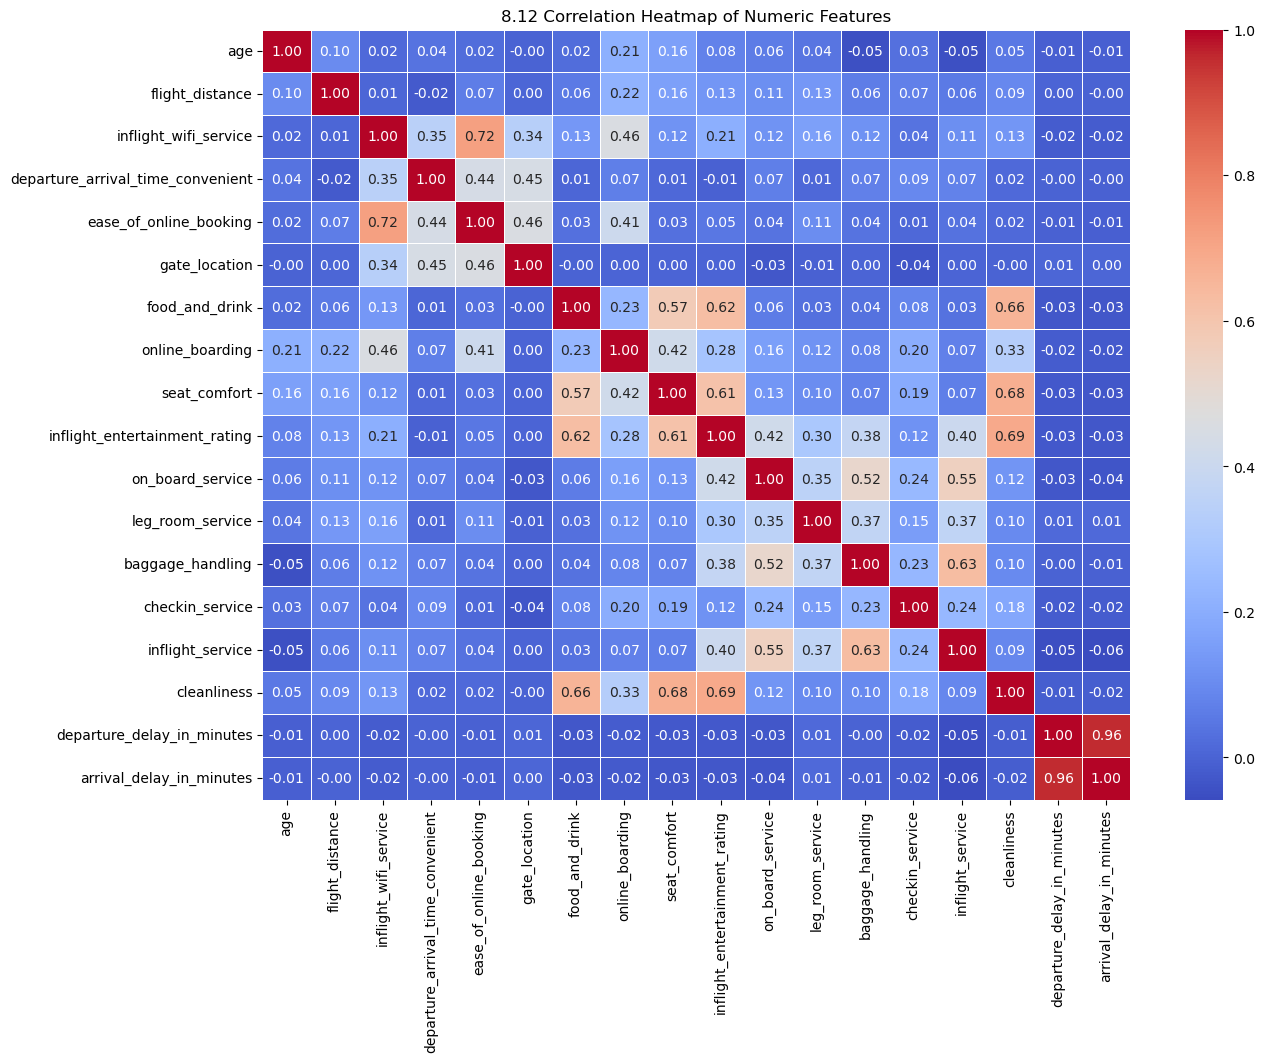

### Observation:




<a id=section813></a>
**8.13. What combination of features most strongly predicts passenger satisfaction?**

### Observation:



<a id=section814></a>
**8.14. What combination of features most strongly predicts passenger satisfaction?**

### Observation:




<a id=section815></a>
**8.15. What combination of features most strongly predicts passenger satisfaction?**

### Observation:




---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section9.1></a>
### **9.1 Conclusion**

* Passenger satisfaction is influenced by a combination of **service quality**, **flight experience**, and **demographic factors**.
* **Business class travelers**, **loyal customers**, and **older age groups** show higher satisfaction, suggesting these segments receive or perceive better service.
* Service components like **seat comfort**, **inflight entertainment**, and **online boarding** play a critical role in determining overall satisfaction.
* **Delays in flight schedules** significantly correlate with dissatisfaction, indicating the importance of operational efficiency.
* While gender does not majorly impact satisfaction, **flight distance**, **purpose of travel**, and **digital touchpoints** like booking and check-in show clear patterns in passenger sentiment.


<a name = Section9.2></a>
### **9.2 Actionable Insights**


1. **Enhance Service in Economy Class**

   * Focus on improving comfort, food quality, and entertainment for **Eco class** passengers to elevate their experience.

2. **Reward and Retain Loyal Customers**

   * Maintain high service standards and personalized perks for **loyal customers** to drive long-term satisfaction and retention.

3. **Prioritize On-time Performance**

   * Invest in **operations and schedule management** to reduce both departure and arrival delays and improve satisfaction scores.

4. **Upgrade Digital Interfaces**

   * Improve the **ease of online booking** and **online boarding** processes to enhance the digital customer journey, especially for tech-savvy users.

5. **Target Personal Travelers with Value Offers**

   * Since **business travelers** are generally more satisfied, develop strategies and bundled offerings to **boost satisfaction for personal travelers**.

6. **Focus on High-impact Amenities**

   * Features like **seat comfort**, **entertainment**, and **cleanliness** should be continuously optimized as they strongly correlate with satisfaction.

7. **Customize Experience by Age Segment**

   * Offer tailored experiences or communication strategies for **younger passengers** to address their dissatisfaction trends.

8. **Monitor and Leverage Flight Distance**

   * Since **longer flights correlate with higher satisfaction**, ensure that short-haul flights receive **proportional quality** attention to bridge the gap.

9. **Use Correlation Patterns to Align Services**

   * Leverage high correlations among onboard services (e.g., **check-in, boarding, cleanliness**) to create **integrated service improvement plans**.
